# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\211122IF_211101exp_Mdc1ab_45h\cov1_Mdc1-568 H3K9me2-488 PolS5-647\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\211122IF_210922exp_Mdc1ab_45h\Mdc1-568 H3K9me2-488 PolS5-647\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [5]:
combined_df = pd.concat([exp1_df,exp2_df])

print(len(combined_df))


measurement_for_all_fov_df = combined_df

571


# 3. Post-hoc analysis examples

In [6]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Mdc1_fixed_analysis'

analysis_savename = 'mdc-568_h3k9me2_pol2_analyzed.xlsx'

In [7]:
# remove the bad cell that has no Pol2 signal
analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

print(len(analysis_df))

#analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

571


In [8]:
# remove the bad cell that has no Pol2 signal
#analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())


# for subset control
analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_subset_control_Pol2S5'].mean())



# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_H3K9me2'] = analysis_df['ave_intensity_incorporated_chr_H3K9me2']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K9me2']
print(analysis_df['normalized_inc_H3K9me2'].mean())


# for subset control
analysis_df['normalized_subset_control_H3K9me2']=analysis_df['ave_intensity_subset_control_chr_H3K9me2']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K9me2']
print(analysis_df['normalized_subset_control_H3K9me2'].mean())








# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_inc_Mdc1'].mean())


# for subset control
analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_subset_control_Mdc1'].mean())





# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_inc_dna'].mean())


# for subset control
analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_subset_control_dna'].mean())

0.7603966083675944
1.015588521693435
1.1084695552784072
1.0198741761356558
5.699261239759492
1.0449259845211945
1.088380157571813
1.0098560357358763


In [9]:
analysis_df

,Unnamed: 0,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,area_nucleo-excluded_control_chr,...,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5,normalized_inc_Pol2S5,normalized_subset_control_Pol2S5,normalized_inc_H3K9me2,normalized_subset_control_H3K9me2,normalized_inc_Mdc1,normalized_subset_control_Mdc1,normalized_inc_dna,normalized_subset_control_dna
0,0,cov1_Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,3,"[[1469, 432], 1]",220,4,216,30425,6143,...,NaN,130.940114,1.481037,0.596640,1.180130,0.830896,2.911626,0.672948,1.305735,0.898057
1,0,cov1_Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,10,"[[1461, 716], 1]",231,33,198,43898,9715,...,NaN,158.437816,1.344412,0.711213,1.727468,0.967089,2.834067,0.888289,1.221630,0.880430
2,0,cov1_Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,14,"[[794, 934], 1]",100,1,99,11010,2317,...,NaN,234.358184,1.780509,0.630523,1.098563,0.806263,2.944654,0.836207,1.166521,0.599655
3,0,cov1_Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,17,"[[416, 1045], 1]",489,4,485,27074,6391,...,NaN,90.800649,0.438660,1.143767,0.671685,1.595191,5.195608,1.402380,1.030910,1.225802
4,0,cov1_Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,18,"[[1051, 1033], 1]",453,0,453,13732,3296,...,NaN,76.995828,0.603771,0.862700,0.967218,0.798196,3.341654,0.628958,0.870758,0.708119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,28,"[[317, 1650], 7]",317,0,317,22145,5043,...,NaN,286.676171,0.718497,1.496423,0.867578,1.068940,4.577453,0.854425,1.099030,0.781801
250,0,Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,2,"[[1462, 853], 7]",129,0,129,12542,3295,...,NaN,413.628538,0.735072,1.148195,1.102242,0.987751,3.293417,1.202871,0.947809,1.002712
251,0,Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,13,"[[1082, 1084], 7]",888,11,877,17927,5207,...,NaN,592.965424,0.722428,0.741913,1.234379,0.759615,7.644727,0.423184,1.002385,0.871282
252,0,Mdc1-568 H3K9me2-488 PolS5-647,RPE1 atcc noco45h Mdc1-568 H3K9me2-488 RNApol6...,14,"[[1697, 1122], 7]",170,0,170,22153,6172,...,NaN,603.954007,1.007627,0.666224,0.711536,1.175747,7.198438,2.130375,0.666271,1.145197


In [10]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

MW comparision: 0.0001335680480584022


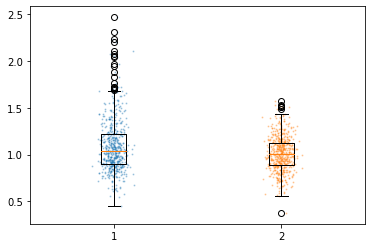

In [11]:
# for dna

# 
g1 = analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 4.0755230944836326e-187


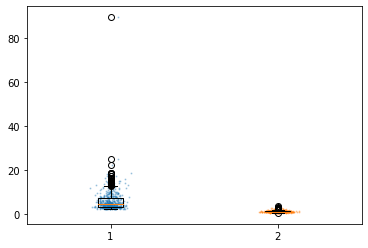

In [12]:
# for mdc1

# 
g1 = analysis_df['normalized_inc_Mdc1']
g2 = analysis_df['normalized_subset_control_Mdc1']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.5804207767657188e-55


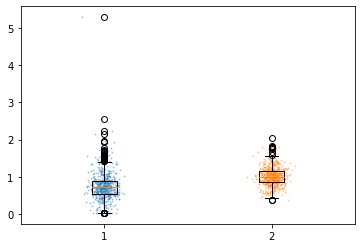

In [13]:
# For Pol2S5
g1 = analysis_df['normalized_inc_Pol2S5']
g2 = analysis_df['normalized_subset_control_Pol2S5']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 6.553565984432586e-52


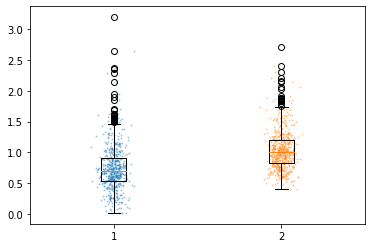

In [14]:
# For Pol2S5 norm to dna
g1 = analysis_df['normalized_inc_Pol2S5']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_Pol2S5']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.0009058769313237341


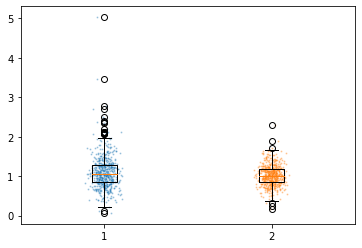

In [15]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K9me2']
g2 = analysis_df['normalized_subset_control_H3K9me2']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.024867783859553842


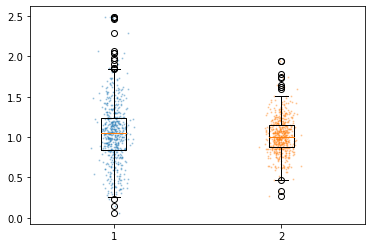

In [16]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K9me2']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_H3K9me2']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [17]:
from scipy import stats
stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9me2'])

SpearmanrResult(correlation=0.2398095406298927, pvalue=6.524760989824306e-09)

SpearmanrResult(correlation=0.2398095406298927, pvalue=6.524760989824306e-09)

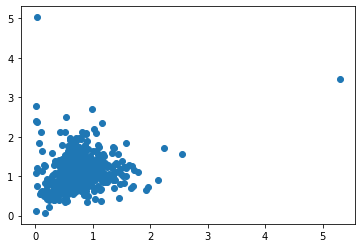

In [18]:
plt.scatter(x= analysis_df['normalized_inc_Pol2S5'], y =analysis_df['normalized_inc_H3K9me2'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9me2'])

SpearmanrResult(correlation=0.2398095406298927, pvalue=6.524760989824306e-09)

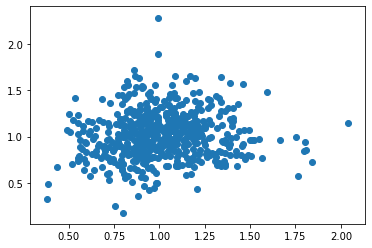

In [19]:
plt.scatter(x= analysis_df['normalized_subset_control_Pol2S5'], y =analysis_df['normalized_subset_control_H3K9me2'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], analysis_df['normalized_inc_H3K9me2'])

In [20]:
stats.spearmanr(analysis_df['normalized_subset_control_Pol2S5'], analysis_df['normalized_subset_control_H3K9me2'])

SpearmanrResult(correlation=0.08980286926641427, pvalue=0.031910644070711446)